#### **MORE EXERCISE!**

**`There are no instructions for this exercise. Just apply what you have learned about data preprocessing and model building to the 'income' dataset. Two mandatory things to do are you have to give arguments about what you do in each step and interpret the results (as we usually do in the previous exercises).`**

**NB:** *Please explore and preprocess the data thoroughly as we may improve this notebook in the upcoming sessions.*

<hr>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


### **Import Libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer

from sklearn.metrics import fbeta_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')

### **Load Dataset**

In [ ]:
# Read Data
# df.head()
df = pd.read_csv('/content/drive/MyDrive/Makassar Coding/Day-5/Exercise/income.csv')
df.head()


,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### **Exploratory Data Analysis**

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work            32561 non-null  object
 2   final weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education num   32561 non-null  int64 
 5   marital status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital gained  32561 non-null  int64 
 11  capital lost    32561 non-null  int64 
 12  hours per week  32561 non-null  int64 
 13  native country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Check feature 'income' proportion using .value_counts(True)
df['income'].value_counts(True)

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

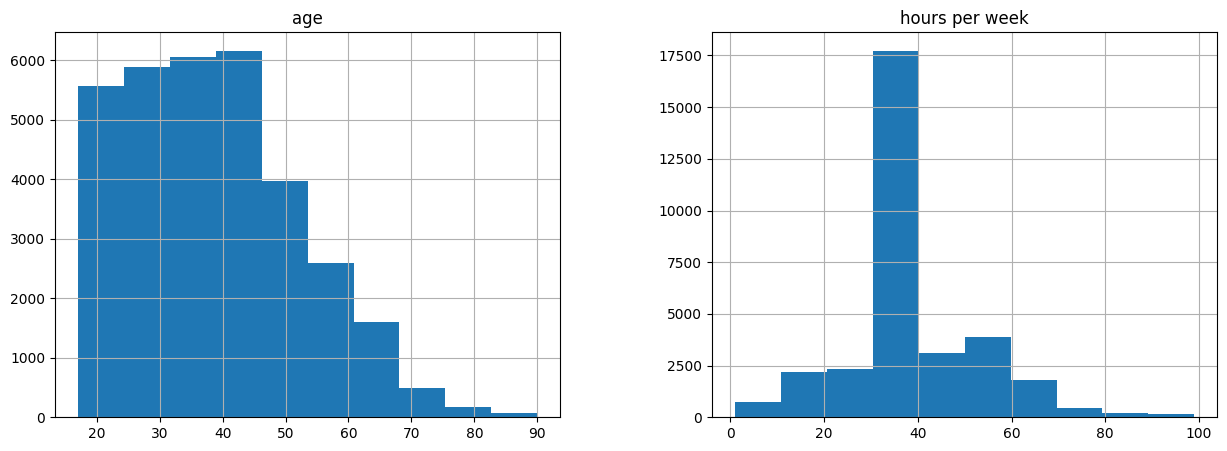

In [ ]:
# create list numerical columns as num_cols
# Show Histogram using .hist with figsize(15, 5) .hist(figsize=(15, 5))

num_cols = ['age', 'hours per week']

df[num_cols].hist(figsize=(15, 5));


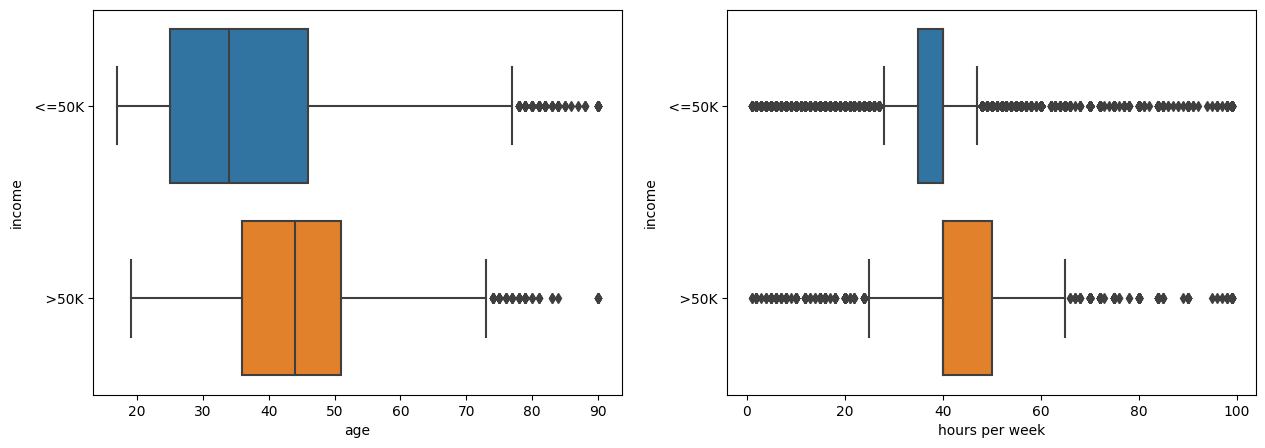

In [ ]:
# Create subplot box plot for num_cols

fig, ax = plt.subplots(1, 2, figsize=(15,5))

for ix, col in enumerate(num_cols):
    sns.boxplot(x=col, y='income', data=df, ax=ax[ix]);

In [ ]:
# check statistical descriptive 'hours per week' group by 'income'
df.groupby(['income'])['hours per week'].describe()

,count,mean,std,min,25%,50%,75%,max
income,,,,,,,,
<=50K,24720.0,38.840210,12.318995,1.0,35.0,40.0,40.0,99.0
>50K,7841.0,45.473026,11.012971,1.0,40.0,40.0,50.0,99.0


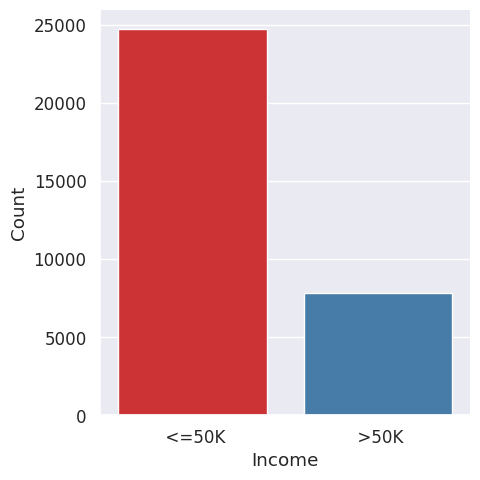

In [ ]:
# Plot income proportion.

sns.set(style='darkgrid', font_scale = 1.1, palette='Set1')
ax = sns.catplot(x='income', data=df, kind='count', height=5)
plt.xlabel('Income')
plt.ylabel('Count');

`Gender`

In [ ]:
# Income categories by gender.
#  .value_counts(True)
#  .rename('percentage')
#  .mul(100)
#  .reset_index()
#  .sort_values('gender'))

# save result as gender_income

df.groupby(['income'])['gender'].value_counts(True)\
          .rename('percentage') \
          .mul(100) \
          .reset_index() \
          .sort_values('gender')

gender_income = df.groupby(['income'])['gender'].value_counts(True)\
                                                .rename('percentage') \
                                                .mul(100) \
                                                .reset_index() \
                                                .sort_values('gender')
gender_income                                            


,income,gender,percentage
1,<=50K,Female,38.802589
3,>50K,Female,15.036347
0,<=50K,Male,61.197411
2,>50K,Male,84.963653


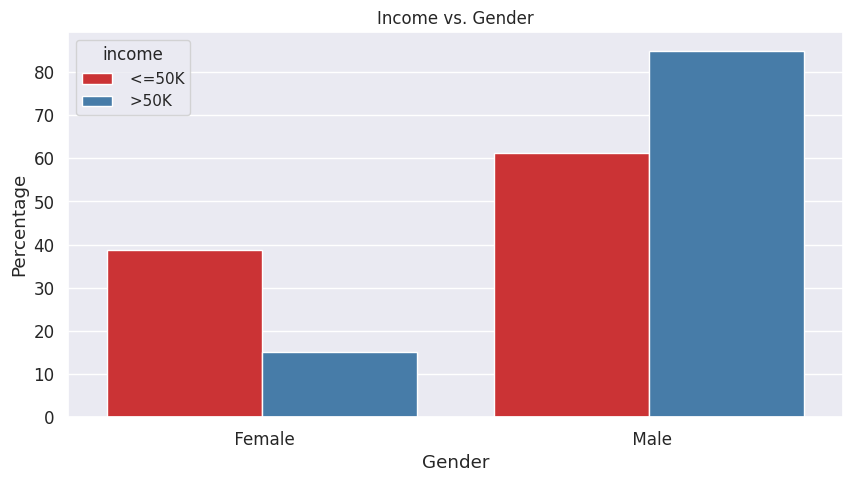

In [ ]:
# Plot income vs gender.
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style='darkgrid', font_scale=1, palette='Set1',)
sns.barplot(x='gender', y='percentage', hue='income', data=gender_income)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Income vs. Gender');



`Race`

In [ ]:
# Income categories by race.
#                 .value_counts(True)
#                 .rename('percentage')
#                 .mul(100)
#                 .sort_values()
#                 .reset_index())

# save as result as race_income

race_income = df.groupby(['income'])['race'].value_counts(True)\
                                                .rename('percentage') \
                                                .mul(100) \
                                                .reset_index() \
                                                .sort_values('race')
race_income                                                


,income,race,percentage
3,<=50K,Amer-Indian-Eskimo,1.112460
8,>50K,Amer-Indian-Eskimo,0.459125
2,<=50K,Asian-Pac-Islander,3.086570
7,>50K,Asian-Pac-Islander,3.519959
1,<=50K,Black,11.072006
6,>50K,Black,4.935595
4,<=50K,Other,0.995146
9,>50K,Other,0.318837
0,<=50K,White,83.733819
5,>50K,White,90.766484


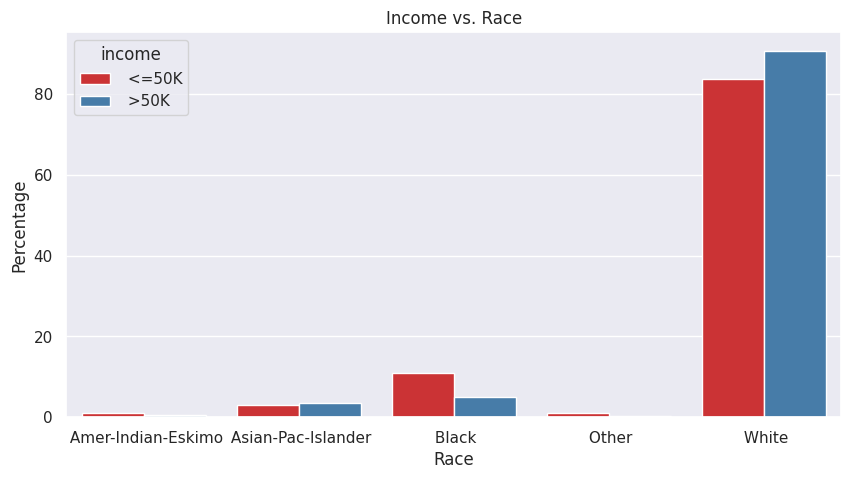

In [ ]:
# Plot income vs race.
fig, ax = plt.subplots(figsize=(10, 5))
sns.set(style='darkgrid', font_scale=1, palette='Set1')
sns.barplot(x='race', y='percentage', hue='income', data=race_income)
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.title('Income vs. Race');

`Age`

In [ ]:
# Create age_group column to categorize the range of age.
age_list = [df]

for age in age_list:
    age.loc[age['age'] < 30, 'age_group'] = 20
    age.loc[(age['age'] >= 30) & (age['age'] <= 39), 'age_group'] = 30
    age.loc[(age['age'] >= 40) & (age['age'] <= 49), 'age_group'] = 40
    age.loc[(age['age'] >= 50) & (age['age'] <= 59), 'age_group'] = 50
    age.loc[(age['age'] >= 60) & (age['age'] <= 69), 'age_group'] = 60
    age.loc[(age['age'] >= 70) & (age['age'] <= 79), 'age_group'] = 70
    age.loc[age['age'] >= 80, 'age_group'] = 80

In [ ]:
# Change age_group type from float 64 to int64.
df.head()

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income,age_group
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20.0


In [ ]:
# Income categories by age_group.
#                 .value_counts(True)
#                 .rename('percentage')
#                 .mul(100)
#                 .sort_values()
#                 .reset_index())

# Save result as age_income

age_income = df.groupby(['income'])['age_group'].value_counts(True)\
                                                .rename('percentage') \
                                                .mul(100) \
                                                .reset_index() \
                                                .sort_values('age_group')
age_income                 

,income,age_group,percentage
0,<=50K,20.0,37.216828
11,>50K,20.0,6.517026
1,<=50K,30.0,25.501618
8,>50K,30.0,29.447775
2,<=50K,40.0,18.256472
7,>50K,40.0,33.949751
3,<=50K,50.0,10.966828
9,>50K,50.0,21.770182
4,<=50K,60.0,5.970874
10,>50K,60.0,6.874123


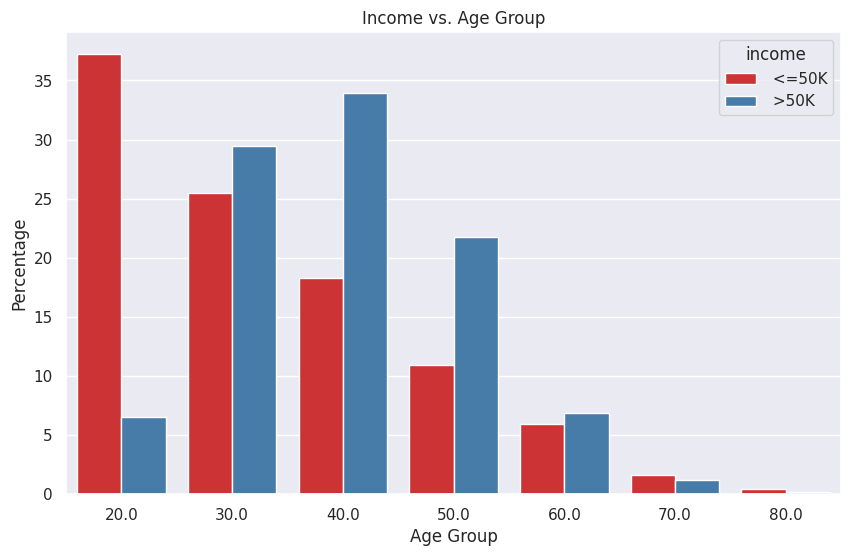

In [ ]:
# Plot income vs age_group.
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style='darkgrid', font_scale=1, palette='Set1')
sns.barplot(x='age_group', y='percentage', hue='income', data=age_income)
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Income vs. Age Group');

`Relationship`

In [ ]:
# Income categories by relationship.
# save results as relationship_income

relationship_income = df.groupby(['income'])['relationship'].value_counts()                                                .rename('percentage') \
                                                .mul(100) \
                                                .reset_index() \
                                                .sort_values('relationship')
relationship_income                                                

,income,relationship,percentage
1,<=50K,Husband,727500
6,>50K,Husband,591800
0,<=50K,Not-in-family,744900
7,>50K,Not-in-family,85600
4,<=50K,Other-relative,94400
11,>50K,Other-relative,3700
2,<=50K,Own-child,500100
10,>50K,Own-child,6700
3,<=50K,Unmarried,322800
9,>50K,Unmarried,21800


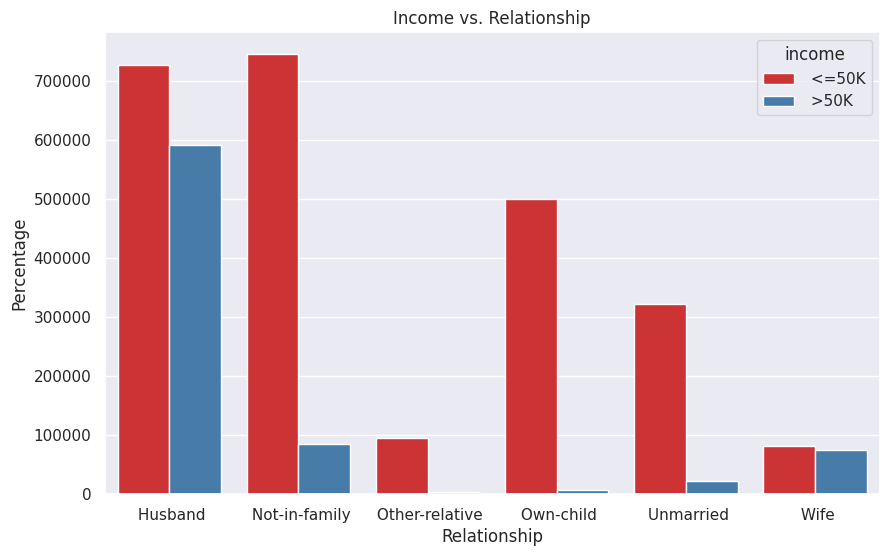

In [ ]:
# Plot income vs relationship.
fig, ax = plt.subplots(figsize=(10, 6))
sns.set(style='darkgrid', font_scale=1, palette='Set1')
sns.barplot(x='relationship', y='percentage', hue='income', data=relationship_income)
plt.xlabel('Relationship')
plt.ylabel('Percentage')
plt.title('Income vs. Relationship');

`Occupation`

In [ ]:
# Income categories by occupation.
# Save results as occupation_income

occupation_income = df.groupby(['income'])['occupation'].value_counts()                                                .rename('percentage') \
                                                .mul(100) \
                                                .reset_index() \
                                                .sort_values('occupation')
occupation_income                                                

,income,occupation,percentage
24,>50K,?,19100
7,<=50K,?,165200
0,<=50K,Adm-clerical,326300
19,>50K,Adm-clerical,50700
28,>50K,Armed-Forces,100
14,<=50K,Armed-Forces,800
1,<=50K,Craft-repair,317000
18,>50K,Craft-repair,92900
15,>50K,Exec-managerial,196800
5,<=50K,Exec-managerial,209800


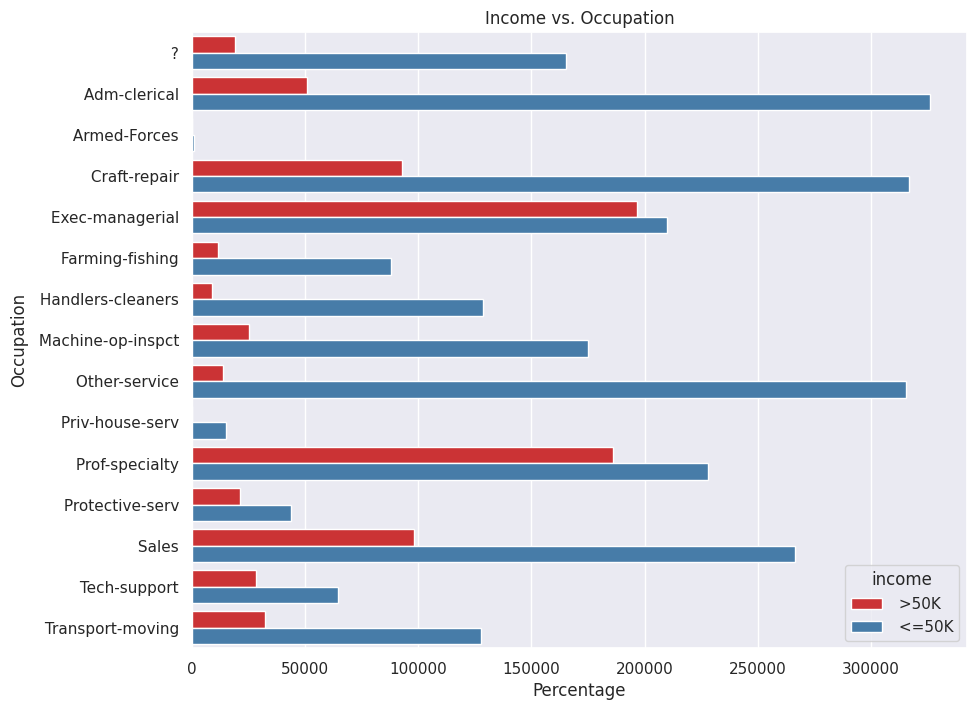

In [ ]:
# Plot income vs age_group.
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style='darkgrid', font_scale=1, palette='Set1')
sns.barplot(y='occupation', x='percentage', hue='income', data=occupation_income)
plt.ylabel('Occupation')
plt.xlabel('Percentage')
plt.title('Income vs. Occupation');

`Country`

In [ ]:
# Check unique value 'native country'
df['native country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
# Modify native country column.
df['native country enc'] = df['native country'].apply(lambda x: 1 if x == ' United-States' else 0)


In [ ]:
# Check value_counts 'native country enc'
df['native country enc'].value_counts()

1    29170
0     3391
Name: native country enc, dtype: int64

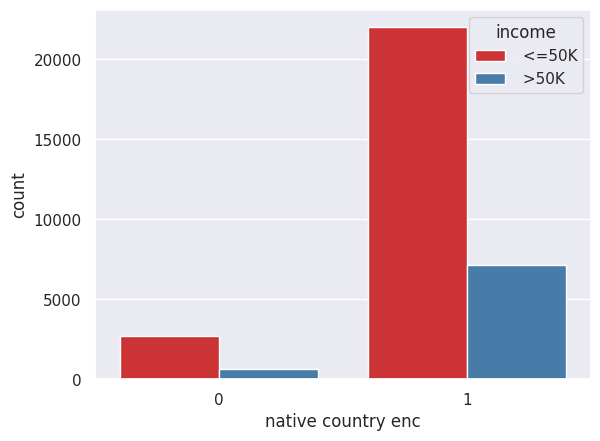

In [ ]:
sns.countplot(x='native country enc', hue='income', data=df);


In [ ]:
# Check income proportion with 'native country enc'] == 1
df.groupby(['native country enc'])['income'].value_counts(True)

native country enc  income
0                    <=50K    0.802418
                     >50K     0.197582
1                    <=50K    0.754165
                     >50K     0.245835
Name: income, dtype: float64

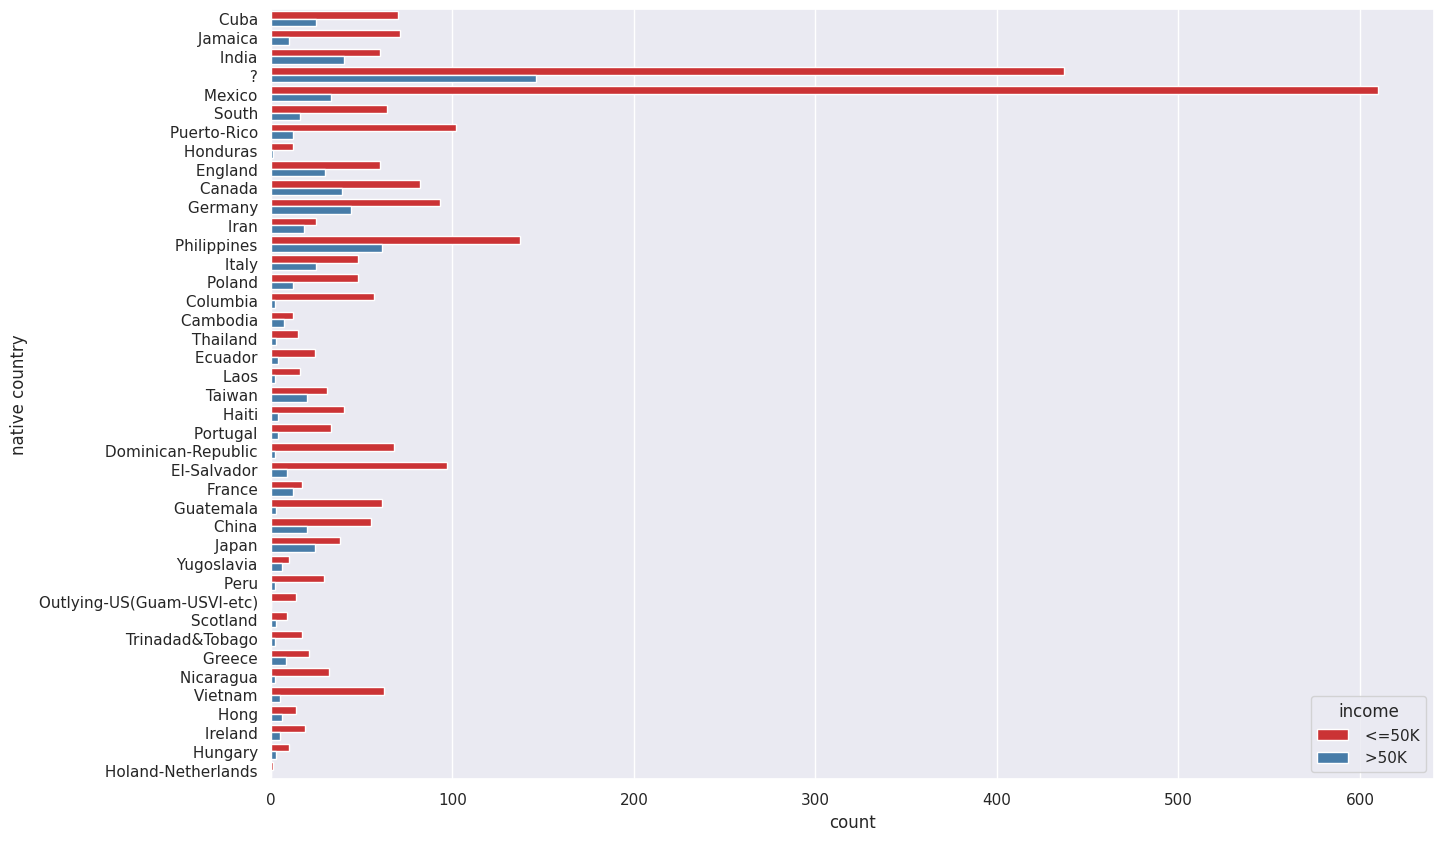

In [ ]:

plt.figure(figsize=(15, 10))
sns.countplot(y='native country', hue='income', data=df[df['native country enc'] == 0]);

### **Data Cleaning & Preprocessing**

In [ ]:
# The default of keep is 'first'. Thus will only count the first occurrence.
# Check duplicated data 
df[df.duplicated()].count()


age                   24
work                  24
final weight          24
education             24
education num         24
marital status        24
occupation            24
relationship          24
race                  24
gender                24
capital gained        24
capital lost          24
hours per week        24
native country        24
income                24
age_group             24
native country enc    24
dtype: int64

In [ ]:
# Set keep = False to find the total row of duplicated data.
df[df.duplicated(keep=False)].count()

age                   47
work                  47
final weight          47
education             47
education num         47
marital status        47
occupation            47
relationship          47
race                  47
gender                47
capital gained        47
capital lost          47
hours per week        47
native country        47
income                47
age_group             47
native country enc    47
dtype: int64

In [ ]:
# Drop Duplicates
df = df.drop_duplicates()
df

,age,work,final weight,education,education num,marital status,occupation,relationship,race,gender,capital gained,capital lost,hours per week,native country,income,age_group,native country enc
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,30.0,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,50.0,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,30.0,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,50.0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,20.0,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,40.0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,50.0,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,20.0,1


In [ ]:
# check 'work' unique value
df['work'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [ ]:
# Define X and y.
# X Using column except this list ['income', 'native country', 'final weight', 'education', 'capital gained', 'capital lost', 'age_group']
# y = 'income

X = df.drop(columns=['income', 'native country', 'final weight', 'education', 'capital gained', 'capital lost', 'age_group'], axis=1)
y = df['income']


In [ ]:
# Split data. 80 train, 20 test, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)


In [ ]:
X_train.head(3)

,age,work,education num,marital status,occupation,relationship,race,gender,hours per week,native country enc
14249,37,Private,9,Divorced,Machine-op-inspct,Not-in-family,White,Male,40,1
3997,37,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,40,1
8533,34,State-gov,13,Divorced,Prof-specialty,Not-in-family,White,Male,55,1


**Preprocessing Schemas**

- Missing values (?) ['work', 'occupation] --> Impute with mode.
- Categorical columns: work, marital status, occupation, relationship, race, gender --> onehotencoder
- Numerical columns scaling: age, hours per week --> RobustScaler
- Numerical columns: education num, native country enc --> No preprocessing needed.

In [ ]:
# Prepare column transformers
num_cols         = ['age', 'hours per week']
cat_cols         = ['work', 'marital status', 'occupation', 'relationship', 'race', 'gender']
imputed_cat_cols = ['work', 'occupation']
ignore           = ['education num', 'native country enc']

imputer_mode     = SimpleImputer(missing_values='?', strategy='most_frequent')
ohe              = OneHotEncoder(drop='first')
scaler           = RobustScaler()
ignore_cols      = FunctionTransformer() # Custom transformer that will do nothing.

# Pipeline
imputed_pipeline = Pipeline([
        ('imputer', imputer_mode),
        ('encoder', ohe)
])

transformer = ColumnTransformer([
        ('imputed pipeline', imputed_pipeline, imputed_cat_cols),
        ('encoder', ohe, cat_cols),
        ('ignore', ignore_cols, ignore)
])

transformer_with_scaling = ColumnTransformer([
        ('imputed pipeline', imputed_pipeline, imputed_cat_cols),
        ('encoder', ohe, cat_cols),
        ('scaling', scaler, num_cols),
        ('ignore', ignore_cols, ignore)
])

In [ ]:
y_train.head()

14249     <=50K
3997      <=50K
8533      <=50K
8691       >50K
20727     <=50K
Name: income, dtype: object

In [ ]:
y_test.head()


29541      >50K
26985      >50K
23437     <=50K
7187      <=50K
13378     <=50K
Name: income, dtype: object

In [ ]:
# Encode y_train & y_test using ..apply(lambda x: 1 if x == ' >50K' else 0)
y_train = y_train.apply(lambda x: 1 if x == ' >50K' else 0)
y_test = y_test.apply(lambda x: 1 if x == ' >50K' else 0)

### **Model Training**

**Model Pipelines**

In [ ]:
# Prepare training pipeline for each model.
logreg = LogisticRegression(random_state=42, max_iter=1000)
dt     = DecisionTreeClassifier(random_state=42)
knn    = KNeighborsClassifier(n_neighbors = 3)


# Pipeline
logreg_pipeline = Pipeline([
        ('preprocessing', transformer_with_scaling),
        ('logreg', logreg)
])

knn_pipeline = Pipeline([
        ('preprocessing', transformer_with_scaling),
        ('knn', knn)
])
dt_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('dt', dt)
])


In [ ]:
logreg_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('imputed pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values='?',
                                                                                 strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['work', 'occupation']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['work', 'marital status',
                                                   'occupation', 'relationship',
                                                   'race', 'gender']),
                                                 ('scaling', RobustScaler(),
                                                  ['age', 'hours per week']),
                                                 ('ignore',
                                                  FunctionTransformer(),
                                                  ['education num',
                                                   'native country enc'])])),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
# Train each model pipeline with CV
print('CV Results\n')
print('Logistic Regression')
print('Accuracy', cross_val_score(logreg_pipeline, X_train, y_train, scoring='accuracy', cv=5).mean())
print('Recall', cross_val_score(logreg_pipeline, X_train, y_train, scoring='recall', cv=5).mean())
print('Precision', cross_val_score(logreg_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

print()
print('Decision Tree')
print('Accuracy', cross_val_score(dt_pipeline, X_train, y_train, scoring='accuracy', cv=5).mean())
print('Recall', cross_val_score(dt_pipeline, X_train, y_train, scoring='recall', cv=5).mean())
print('Precision', cross_val_score(dt_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

print()
print('KNN')
print('Accuracy', cross_val_score(dt_pipeline, X_train, y_train, scoring='accuracy', cv=5).mean())
print('Recall', cross_val_score(dt_pipeline, X_train, y_train, scoring='recall', cv=5).mean())
print('Precision', cross_val_score(dt_pipeline, X_train, y_train, scoring='precision', cv=5).mean())

CV Results

Logistic Regression
Accuracy 0.8342348551257638
Recall 0.551793602547402
Precision 0.6971958156054885

Decision Tree
Accuracy 0.8131707675462903
Recall 0.5327464177160225
Precision 0.6336158548579384

KNN
Accuracy 0.8131707675462903
Recall 0.5327464177160225
Precision 0.6336158548579384


`Interpretation`

Logistic Regression

1. Accuracy: Dari total prediksi yang dilakukan, 83% prediksi bernilai True Positive dan True Negative.

2. Recall: 56% dari total prediksi penduduk dengan gaji di atas $50K berhasil diprediksi dengan benar oleh model.

3. Precision: 69.5% dari total prediksi benar memiliki gaji di atas $50K.

In [ ]:
logreg_pipeline.fit(X_train, y_train)
y_test_pred = logreg_pipeline.predict(X_test)

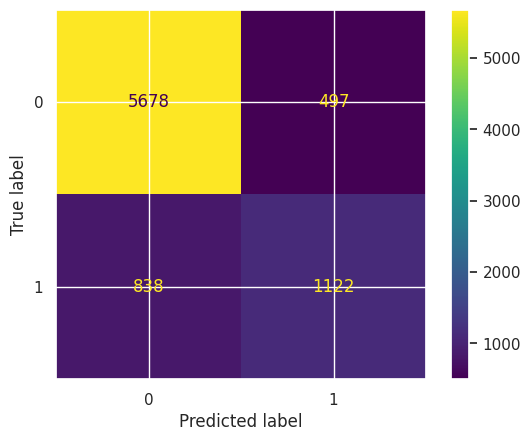

In [ ]:
# Plot confusion matrix.
log_reg_confusion = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(log_reg_confusion).plot();

In [ ]:
logreg_pipeline.score(X_test, y_test)

0.8358942839582053

In [ ]:
logreg_pipeline.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# # Save Model
# import pickle

# filename = 'logreg_pipeline.sav'
# pickle.dump(logreg_pipeline, open(filename, 'wb'))